# Полиномиальные модели
## Цель работы
На практике познакомиться с моделями полиномиальной регрессии и классификации, понять влияние степени полинома на вычислительную сложность и точность модели.

## Содержание работы
1. Загрузите учебный набор данных для регрессии "gen_regression".
2. Постройте модель парной линейной регрессии, оцените ее эффективность, изобразите модель на графике.
3. Постройте модель полиномиальной регрессии второго порядка. Сравните ее эффективность с первой моделью.
4. Загрузите набор данных для классификации "gen_classification".
5. Постройте линейную классификацию, изобразите ее на графике и оцените точность.
6. Введите в данные признаки третьего порядка и постройте классификацию. Сравните с предыдущей моделью.
7. Загрузите набор данных, содержащий данные о продаже домов в округе King county, США.
8. Постройте на этом датасете линейную модель и полиномиальную второго порядка. Изобразите на графике и сравните эффективность.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### 1. Загрузите учебный набор данных для регрессии "gen_regression".

In [3]:
data = pd.read_csv("data/gen_regression.csv", index_col=0)

In [4]:
data.head()

,x,y
0,96.597780,97761.592016
1,48.002892,27613.989207
2,47.939756,29410.187753
3,47.809026,15789.597531
4,69.784427,20953.383453


### 2. Постройте модель парной линейной регрессии, оцените ее эффективность, изобразите модель на графике.

In [5]:
exersice = []
timer = []
scores = []

In [6]:
X = data.x
y = data.y

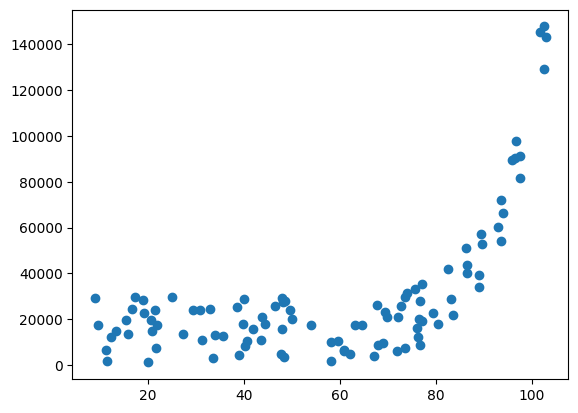

In [7]:
plt.scatter(X, y)

In [8]:
lr = LinearRegression()
X = pd.DataFrame(X)
start = time.time()
lr.fit(X, y)
end = time.time()
print(f'Time : {end - start}')

Time : 0.007373332977294922


c:\Users\Datanomica\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


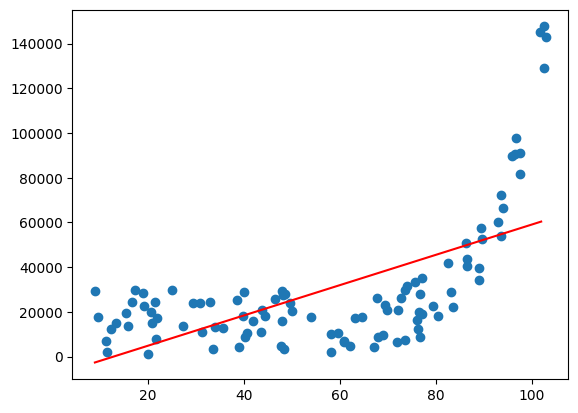

In [9]:
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = lr.predict(pd.DataFrame(xx))

plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')
plt.show()

In [10]:
lr.score(X, y)

0.37467360318911636

In [11]:
exersice.append('reg')
timer.append(end - start)
scores.append(lr.score(X, y))

### 3. Постройте модель полиномиальной регрессии второго порядка. Сравните ее эффективность с первой моделью.

In [12]:
start = time.time()
transformation = PolynomialFeatures(degree=2)
end = time.time()
print("Time: ", end - start)

transformation.fit(X)

X_2 = transformation.transform(X)

X_2.shape
X_2[:5]

Time:  8.940696716308594e-05


array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03],
       [1.00000000e+00, 4.80028921e+01, 2.30427765e+03],
       [1.00000000e+00, 4.79397558e+01, 2.29822018e+03],
       [1.00000000e+00, 4.78090258e+01, 2.28570295e+03],
       [1.00000000e+00, 6.97844271e+01, 4.86986627e+03]])

Первая - это автоматически добавляемая колонка, состоящая из одних единиц (так называемый bias). Ее добавление можно отключить. Вторая - это наш исходный x. А третья - это как раз x^2 - то есть полиномиальный признак.

In [13]:
start = time.time()
poly_2d = LinearRegression().fit(X_2, y)
end = time.time()
print(f'Time : {end - start}')

xx_2d = transformation.transform(pd.DataFrame(xx))

Time : 0.0032296180725097656


c:\Users\Datanomica\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


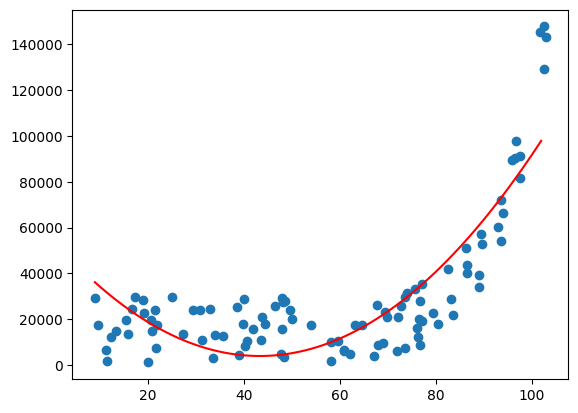

In [14]:
yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

In [15]:
poly_2d.score(X_2, y)

0.7359753787024842

In [16]:
exersice.append('reg-poly2')
timer.append(end - start)
scores.append(poly_2d.score(X_2, y))

### 4. Загрузите набор данных для классификации "gen_classification".

In [17]:
data = pd.read_csv("data/gen_classification.csv",
                   index_col=0)

In [18]:
data.head()

,x1,x2,y
0,0.048289,0.267592,1
1,1.363151,0.171123,0
2,-0.424253,0.893937,0
3,0.112344,0.565672,0
4,-1.262453,0.521735,0


In [19]:
y = data.y
X = data.drop(["y"], axis=1)

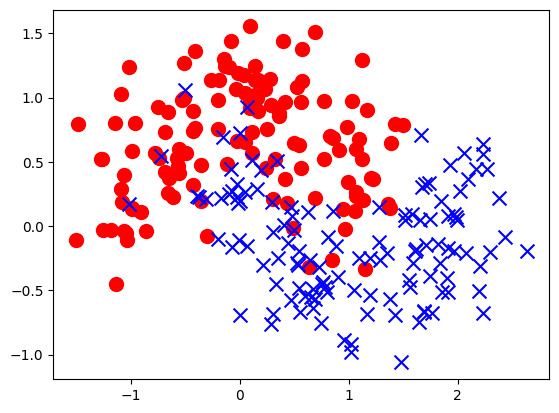

In [20]:
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

### 5. Постройте линейную классификацию, изобразите ее на графике и оцените точность.

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
start = time.time()
logistic = LogisticRegression().fit(X, y)
end = time.time()
print("Time: ", end - start)

Time:  0.012271881103515625


C:\Users\Datanomica\AppData\Local\Temp\ipykernel_13284\739733186.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
C:\Users\Datanomica\AppData\Local\Temp\ipykernel_13284\739733186.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
c:\Users\Datanomica\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


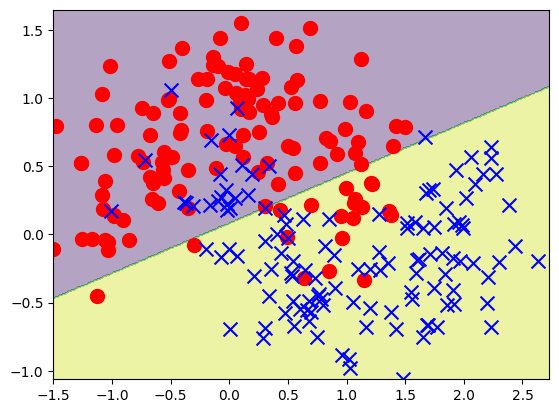

In [23]:
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [24]:
logistic.score(X, y)

0.832

In [25]:
exersice.append('clas')
timer.append(end - start)
scores.append(logistic.score(X, y))

### 6. Введите в данные признаки третьего порядка и постройте классификацию. Сравните с предыдущей моделью.

In [26]:
start = time.time()
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)
end = time.time()
print("Time : ", end - start)

Time :  0.003939390182495117


In [27]:
X_3.shape

(250, 9)

In [28]:
start = time.time()
class_3 = LogisticRegression().fit(X_3, y)
end = time.time()
print("Time : ", end - start)

Time :  0.006932497024536133


c:\Users\Datanomica\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


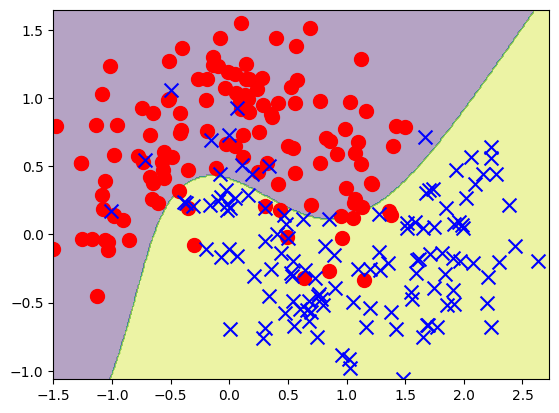

In [29]:
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [30]:
class_3.score(X_3, y)

0.9

In [31]:
exersice.append('clas-poly3')
timer.append(end - start)
scores.append(class_3.score(X_3, y))

### 7. Загрузите набор данных, содержащий данные о продаже домов в округе King county, США.

In [32]:
data_kc_prices = pd.read_csv("data/kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [33]:
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [34]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

In [35]:
X_kc_prices.shape, y_kc_prices.shape

((21613, 18), (21613,))

### 8. Постройте на этом датасете линейную модель и полиномиальную второго порядка. Изобразите на графике и сравните эффективность.

In [36]:
start = time.time()
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
end = time.time()
print("Time: ", end - start)

Time:  0.013323307037353516


In [37]:
reg_kc_multiple.score(X_kc_prices, y_kc_prices)

0.6997471890109153

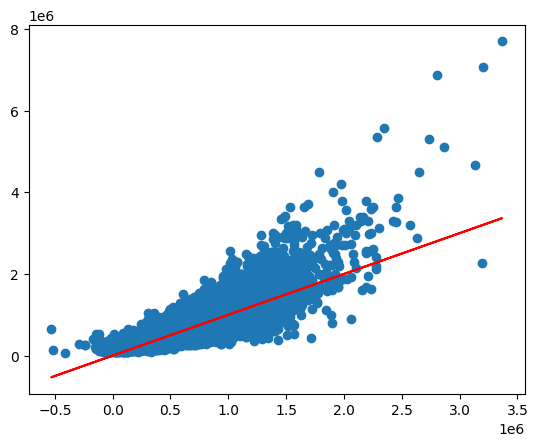

In [38]:
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

In [39]:
reg_kc_multiple.score(X_kc_prices, y_kc_prices)

0.6997471890109153

In [40]:
exersice.append('reg')
timer.append(end - start)
scores.append(reg_kc_multiple.score(X_kc_prices, y_kc_prices))

In [41]:
start = time.time()
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)
end = time.time()

print("Time: ", end - start)

Time:  0.1751716136932373


In [42]:
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)

0.8326020796592957

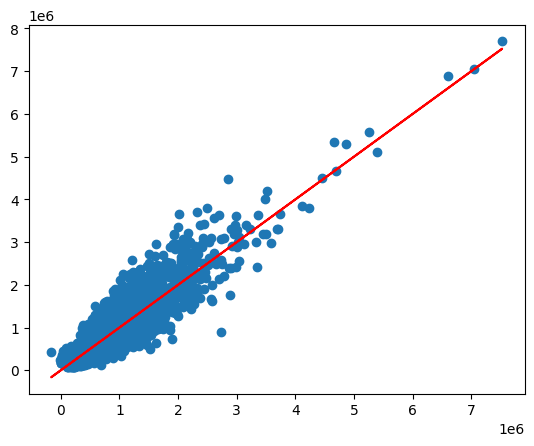

In [43]:
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

In [44]:
reg_poly2_kc.coef_

array([-1.63359180e-08,  8.08109989e-08,  1.09243885e-07, ...,
       -2.63167351e-08, -4.34519478e-09, -6.03546545e-12], shape=(1330,))

In [45]:
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)


0.8326020796592957

In [46]:
exersice.append('reg-poly3')
timer.append(end - start)
scores.append(reg_poly2_kc.score(X_3_kc_prices, y_kc_prices))

## Задания для самостоятельного выполнения

### 1. В выполненной работе добавьте замер времени обучения каждой модели.

In [47]:
DF = {'Excercise': exersice, 'Time' : timer}
DF = pd.DataFrame(DF)
DF

,Excercise,Time
0,reg,0.007373
1,reg-poly2,0.003230
2,clas,0.012272
3,clas-poly3,0.006932
4,reg,0.013323
5,reg-poly3,0.175172


### 2. На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.

In [48]:
data = pd.read_csv("data/gen_regression.csv", index_col=0)
X = data.x
y = data.y
X = pd.DataFrame(X)

In [49]:
degrees = [5, 10, 100]

results = {}

for degree in degrees:
    start_time = time.time()

    poly = PolynomialFeatures(degree=degree)
    X_test_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_test_poly, y)
    end_time = time.time()
    y_pred = model.predict(X_test_poly)
    score = model.score(X_test_poly, y)
    elapsed_time = end_time - start_time
    
    results[degree] = (score, elapsed_time)

results

{5: (0.9217478060447017, 0.0036537647247314453),
 10: (0.9222468251462042, 0.004634380340576172),
 100: (0.7924620004649807, 0.010486125946044922)}

### 3. То же самое проделайте с датасетом для классификации и "King county".

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_kc_prices, y_kc_prices, test_size=0.2, random_state=42)

In [52]:
# degrees = [5, 10, 100]

# for degree in degrees:
#     start_time = time.time()
    
#     poly = PolynomialFeatures(degree=degree)
#     X_train_poly = poly.fit_transform(X_train)
#     X_test_poly = poly.transform(X_test)
    
#     model = LinearRegression()
#     model.fit(X_train_poly, y_train)

#     y_pred = model.predict(X_test_poly)
#     mse = model.score(y_test, y_pred)
#     elapsed_time = time.time() - start_time
    
#     results[degree] = (mse, elapsed_time)

# results

### 4. Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.

Выше представлено

In [53]:
Dd = {'Exercise': exersice, 'Time': timer, 'Score': scores}
m_df = pd.DataFrame(Dd)
m_df.head()

,Exercise,Time,Score
0,reg,0.007373,0.374674
1,reg-poly2,0.003230,0.735975
2,clas,0.012272,0.832000
3,clas-poly3,0.006932,0.900000
4,reg,0.013323,0.699747


### 5. Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.

In [54]:
features = reg_kc_multiple.feature_names_in_

In [55]:
coefficients_king = pd.DataFrame({"Признак": features, "Коэффициент": reg_kc_multiple.coef_})
coefficients_king.sort_values(by="Коэффициент", ascending=False, inplace=True)

In [56]:
coefficients_king

,Признак,Коэффициент
14,lat,602748.226449
5,waterfront,582960.458423
8,grade,95890.445151
6,view,52870.942384
1,bathrooms,41144.278532
7,condition,26385.649139
4,floors,6689.550115
2,sqft_living,110.442865
9,sqft_above,70.785224
10,sqft_basement,39.657640


### 6. Попробуйте также проинтерпретировать полиномиальную модель.

In [57]:
features = poly_features_kc_prices.get_feature_names_out(X_kc_prices.columns)

In [58]:
coefficients_king = pd.DataFrame({"Признак": features, "Коэффициент": reg_poly2_kc.coef_})
coefficients_king.sort_values(by="Коэффициент", ascending=False, inplace=True)

In [59]:
coefficients_king

,Признак,Коэффициент
1261,yr_built zipcode long,0.042422
526,sqft_living^2 lat,0.028320
1182,sqft_above yr_built^2,0.024386
622,sqft_living yr_built^2,0.024255
610,sqft_living sqft_above lat,0.023470
...,...,...
1260,yr_built zipcode lat,-0.031115
645,sqft_living long sqft_living15,-0.035315
1171,sqft_above^2 long,-0.038658
611,sqft_living sqft_above long,-0.046691
